# Lab 5: Supervised Data Mining Methods

## 5.1 Lab Objective
To understand and implement supervised learning algorithms for **classification** and **prediction** tasks.

## 5.2 Background Theory

### Classification vs Prediction
- **Classification**: Assigning categorical labels to data points based on input features
- **Prediction (Regression)**: Estimating continuous values from features

### Algorithms Covered
1. **Decision Trees** - Tree-based splitting rules
2. **Random Forests** - Ensemble of decision trees
3. **Naive Bayes (Bayesian Networks)** - Probabilistic classifier
4. **K-Nearest Neighbors (KNN)** - Instance-based learning
5. **Logistic Regression** - Linear classifier for binary/multiclass
6. **Support Vector Machine (SVM)** - Maximum margin classifier
7. **Artificial Neural Networks (ANN)** - Multi-layer perceptron

### Model Evaluation Metrics
- **Accuracy**: Overall correct predictions
- **Precision**: True positives / (True positives + False positives)
- **Recall (Sensitivity)**: True positives / (True positives + False negatives)
- **F1-Score**: Harmonic mean of precision and recall
- **ROC Curve**: Receiver Operating Characteristic
- **Confusion Matrix**: Visualization of predictions vs actual

In [1]:
# Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

# Scikit-learn imports
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             confusion_matrix, classification_report, roc_curve, auc,
                             precision_recall_curve, roc_auc_score)

# Classification Algorithms
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

print("All libraries imported successfully!")
print(f"NumPy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")

All libraries imported successfully!
NumPy version: 2.0.2
Pandas version: 2.2.2


## 5.3 Experiment

### Step 1: Load and Explore Dataset
We'll use the **Iris Dataset** - a classic dataset for classification with 3 classes of flowers based on 4 features.

In [2]:
# Load the Iris Dataset
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['species'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

print("Dataset Shape:", df.shape)
print("\nFeature Names:", iris.feature_names)
print("\nTarget Classes:", iris.target_names)
print("\n" + "="*50)
print("First 10 rows of the dataset:")
df.head(10)

Dataset Shape: (150, 6)

Feature Names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Target Classes: ['setosa' 'versicolor' 'virginica']

First 10 rows of the dataset:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
5,5.4,3.9,1.7,0.4,0,setosa
6,4.6,3.4,1.4,0.3,0,setosa
7,5.0,3.4,1.5,0.2,0,setosa
8,4.4,2.9,1.4,0.2,0,setosa
9,4.9,3.1,1.5,0.1,0,setosa


In [3]:
# Exploratory Data Analysis
print("Dataset Statistics:")
print(df.describe())

print("\n" + "="*50)
print("\nClass Distribution:")
print(df['species'].value_counts())

Dataset Statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


Class Distribution:
species
setosa        50
versi

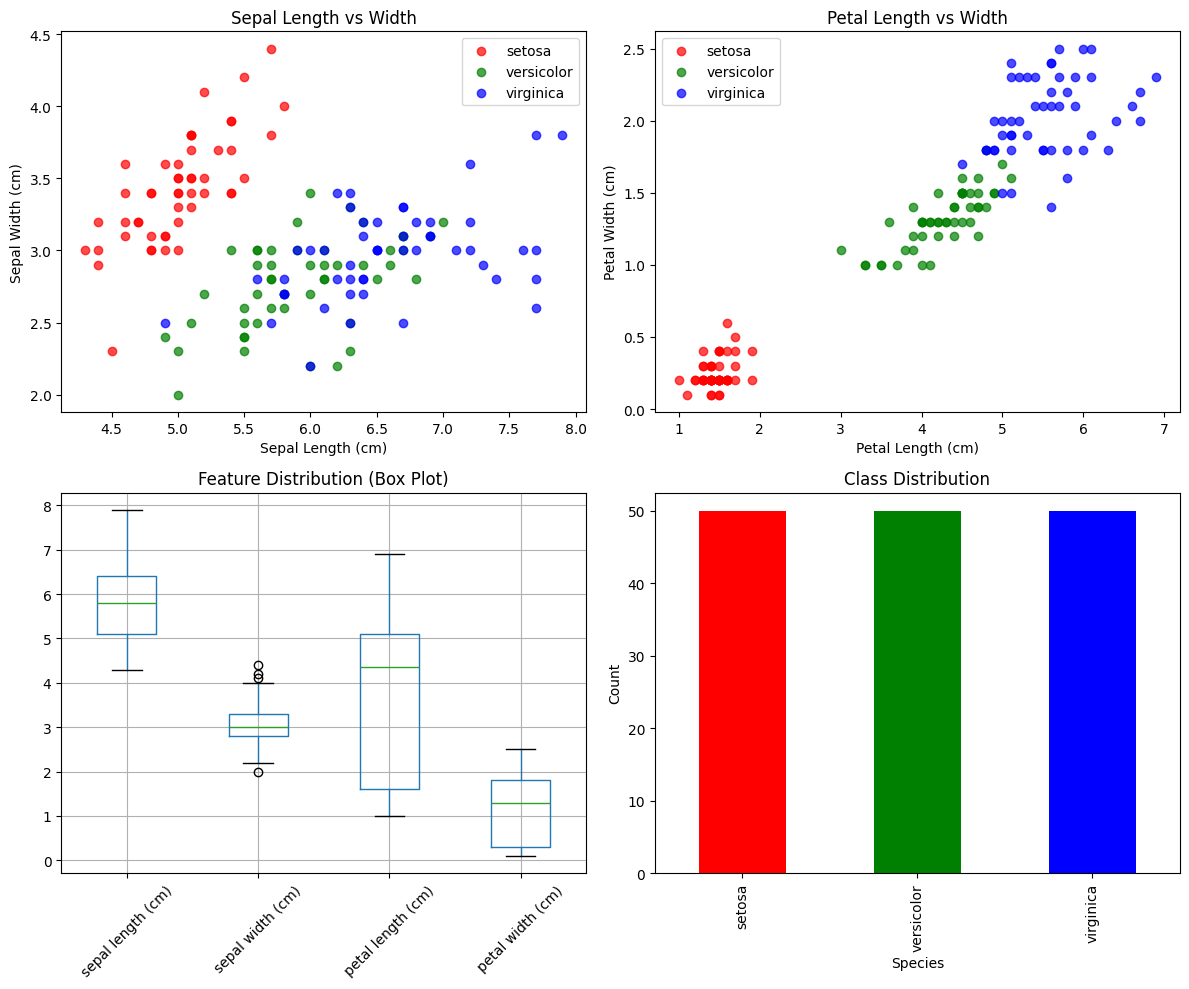

In [4]:
# Visualize the dataset distribution
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Pairwise scatter plot for first two features
colors = ['red', 'green', 'blue']
for i, species in enumerate(['setosa', 'versicolor', 'virginica']):
    subset = df[df['species'] == species]
    axes[0, 0].scatter(subset['sepal length (cm)'], subset['sepal width (cm)'],
                       c=colors[i], label=species, alpha=0.7)
axes[0, 0].set_xlabel('Sepal Length (cm)')
axes[0, 0].set_ylabel('Sepal Width (cm)')
axes[0, 0].set_title('Sepal Length vs Width')
axes[0, 0].legend()

# Pairwise scatter plot for petal features
for i, species in enumerate(['setosa', 'versicolor', 'virginica']):
    subset = df[df['species'] == species]
    axes[0, 1].scatter(subset['petal length (cm)'], subset['petal width (cm)'],
                       c=colors[i], label=species, alpha=0.7)
axes[0, 1].set_xlabel('Petal Length (cm)')
axes[0, 1].set_ylabel('Petal Width (cm)')
axes[0, 1].set_title('Petal Length vs Width')
axes[0, 1].legend()

# Box plot
df.boxplot(column=['sepal length (cm)', 'sepal width (cm)',
                   'petal length (cm)', 'petal width (cm)'], ax=axes[1, 0])
axes[1, 0].set_title('Feature Distribution (Box Plot)')
axes[1, 0].tick_params(axis='x', rotation=45)

# Class distribution bar chart
df['species'].value_counts().plot(kind='bar', ax=axes[1, 1], color=['red', 'green', 'blue'])
axes[1, 1].set_title('Class Distribution')
axes[1, 1].set_xlabel('Species')
axes[1, 1].set_ylabel('Count')

plt.tight_layout()
plt.show()

### Step 2: Data Preparation
Split the data into training and testing sets using **Holdout Method** (80-20 split).

In [5]:
# Prepare features (X) and target (y)
X = df[iris.feature_names].values
y = df['target'].values

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42, stratify=y)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
print(f"\nTraining class distribution: {np.bincount(y_train)}")
print(f"Testing class distribution: {np.bincount(y_test)}")

# Feature Scaling (important for SVM, KNN, ANN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nFeature scaling applied successfully!")

Training set size: 120 samples
Testing set size: 30 samples

Training class distribution: [40 40 40]
Testing class distribution: [10 10 10]

Feature scaling applied successfully!


### Step 3: Implement Classification Algorithms

---
#### 3.1 Decision Tree Classifier
A tree-based model that splits data based on feature thresholds to make decisions.

DECISION TREE CLASSIFIER
Accuracy: 0.9333
Precision (macro): 0.9333
Recall (macro): 0.9333
F1-Score (macro): 0.9333


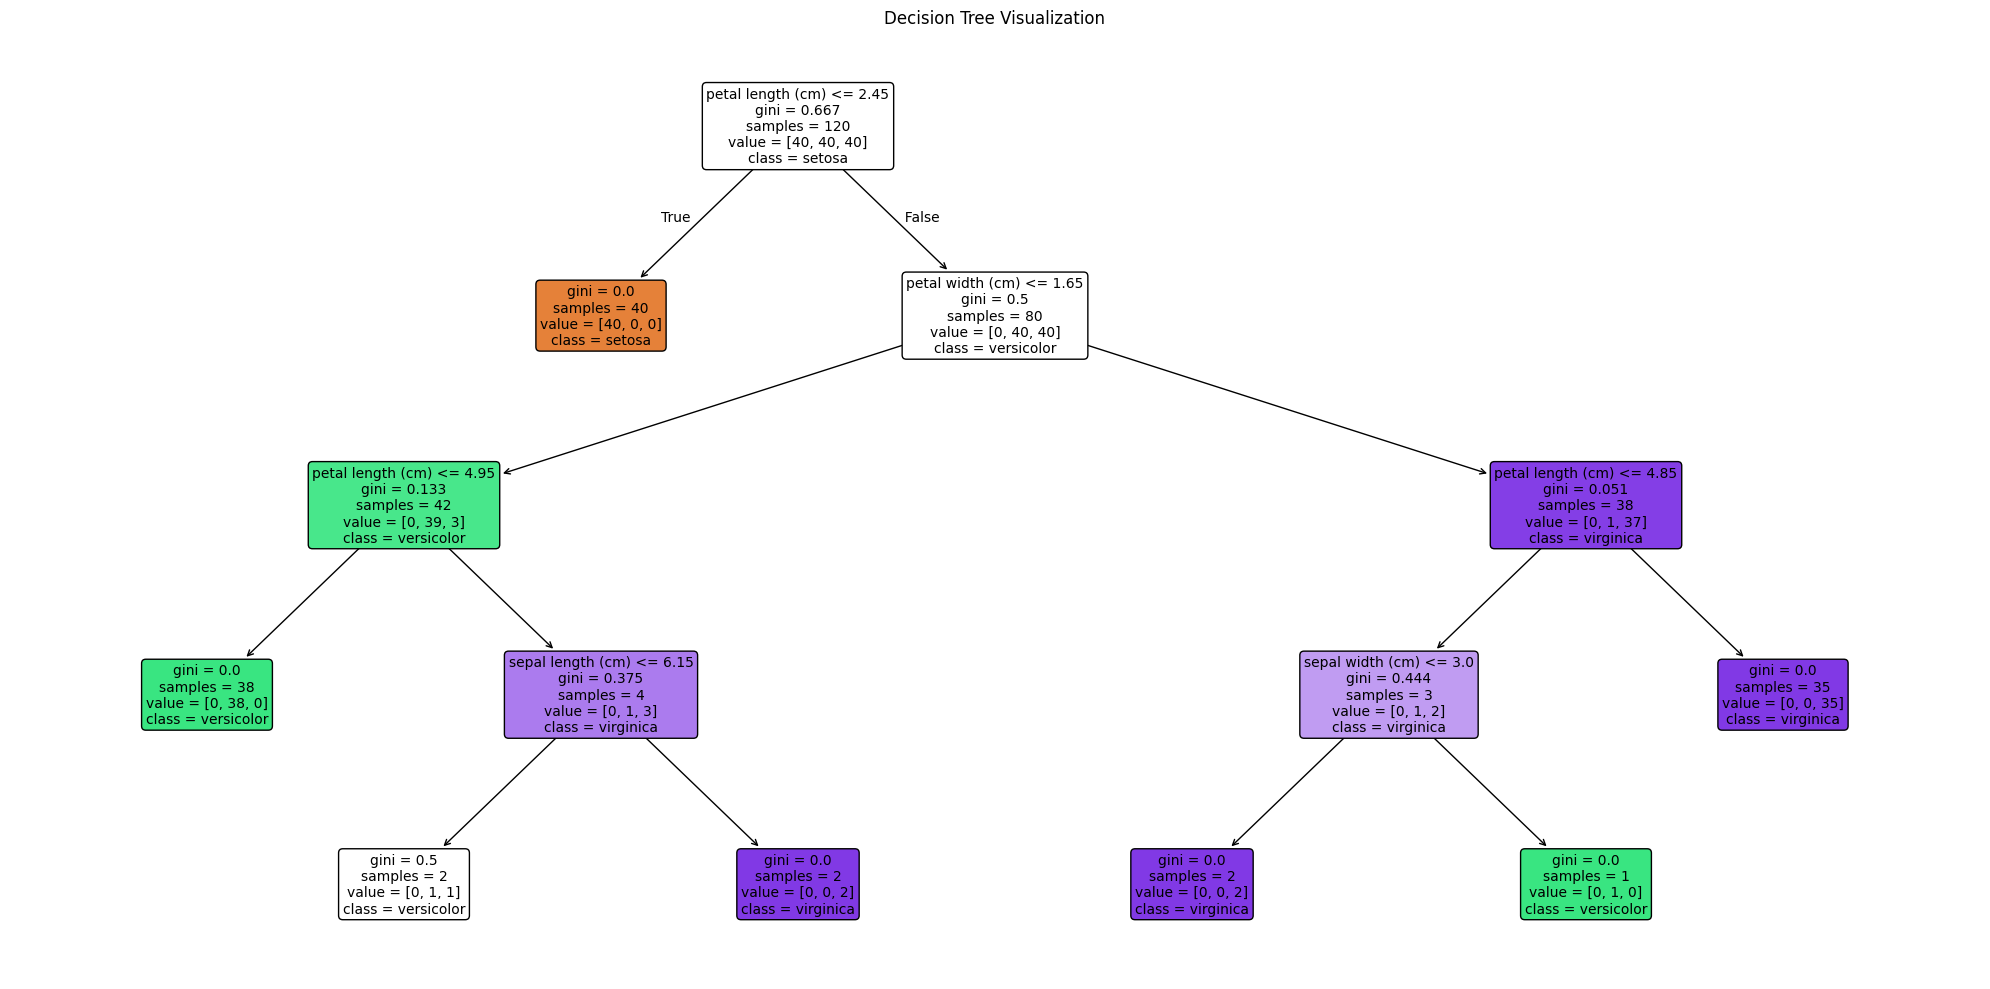

In [6]:
# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_classifier.fit(X_train, y_train)
dt_predictions = dt_classifier.predict(X_test)

print("DECISION TREE CLASSIFIER")
print("="*50)
print(f"Accuracy: {accuracy_score(y_test, dt_predictions):.4f}")
print(f"Precision (macro): {precision_score(y_test, dt_predictions, average='macro'):.4f}")
print(f"Recall (macro): {recall_score(y_test, dt_predictions, average='macro'):.4f}")
print(f"F1-Score (macro): {f1_score(y_test, dt_predictions, average='macro'):.4f}")

# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier, feature_names=iris.feature_names, class_names=iris.target_names,
          filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree Visualization")
plt.tight_layout()
plt.show()

#### 3.2 Random Forest Classifier
An ensemble method that combines multiple decision trees to improve accuracy and reduce overfitting.

RANDOM FOREST CLASSIFIER
Accuracy: 0.9667
Precision (macro): 0.9697
Recall (macro): 0.9667
F1-Score (macro): 0.9666


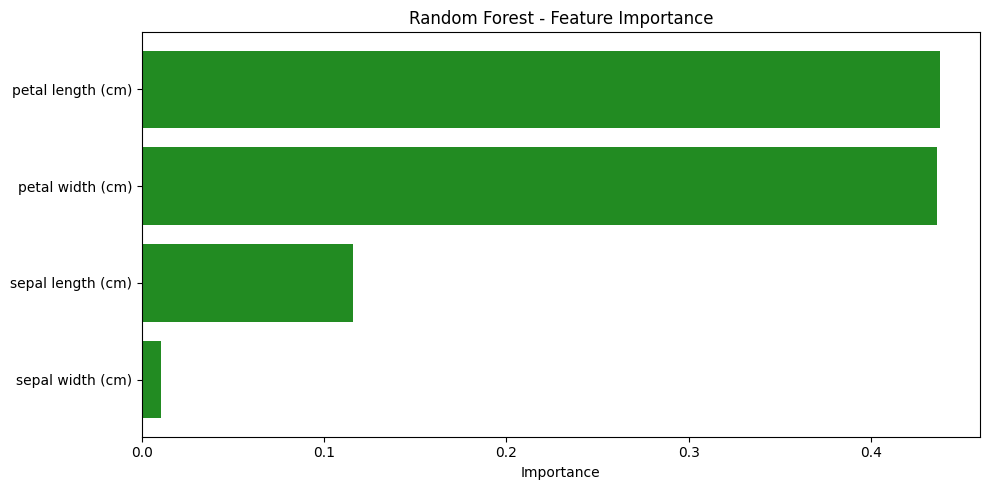


Feature Importance:
             Feature  Importance
2  petal length (cm)    0.437745
3   petal width (cm)    0.435857
0  sepal length (cm)    0.115645
1   sepal width (cm)    0.010754


In [7]:
# Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=42)
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)

print("RANDOM FOREST CLASSIFIER")
print("="*50)
print(f"Accuracy: {accuracy_score(y_test, rf_predictions):.4f}")
print(f"Precision (macro): {precision_score(y_test, rf_predictions, average='macro'):.4f}")
print(f"Recall (macro): {recall_score(y_test, rf_predictions, average='macro'):.4f}")
print(f"F1-Score (macro): {f1_score(y_test, rf_predictions, average='macro'):.4f}")

# Feature Importance
feature_importance = pd.DataFrame({
    'Feature': iris.feature_names,
    'Importance': rf_classifier.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 5))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='forestgreen')
plt.xlabel('Importance')
plt.title('Random Forest - Feature Importance')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("\nFeature Importance:")
print(feature_importance)

#### 3.3 Naive Bayes (Gaussian) - Bayesian Network
A probabilistic classifier based on Bayes' theorem with strong independence assumptions.

In [8]:
# Gaussian Naive Bayes Classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
nb_predictions = nb_classifier.predict(X_test)

print("GAUSSIAN NAIVE BAYES CLASSIFIER")
print("="*50)
print(f"Accuracy: {accuracy_score(y_test, nb_predictions):.4f}")
print(f"Precision (macro): {precision_score(y_test, nb_predictions, average='macro'):.4f}")
print(f"Recall (macro): {recall_score(y_test, nb_predictions, average='macro'):.4f}")
print(f"F1-Score (macro): {f1_score(y_test, nb_predictions, average='macro'):.4f}")

print("\nClassification Report:")
print(classification_report(y_test, nb_predictions, target_names=iris.target_names))

GAUSSIAN NAIVE BAYES CLASSIFIER
Accuracy: 0.9667
Precision (macro): 0.9697
Recall (macro): 0.9667
F1-Score (macro): 0.9666

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



#### 3.4 K-Nearest Neighbors (KNN)
Instance-based learning that classifies based on the majority vote of K nearest neighbors.

K-NEAREST NEIGHBORS CLASSIFIER (K=5)
Accuracy: 0.9333
Precision (macro): 0.9444
Recall (macro): 0.9333
F1-Score (macro): 0.9327


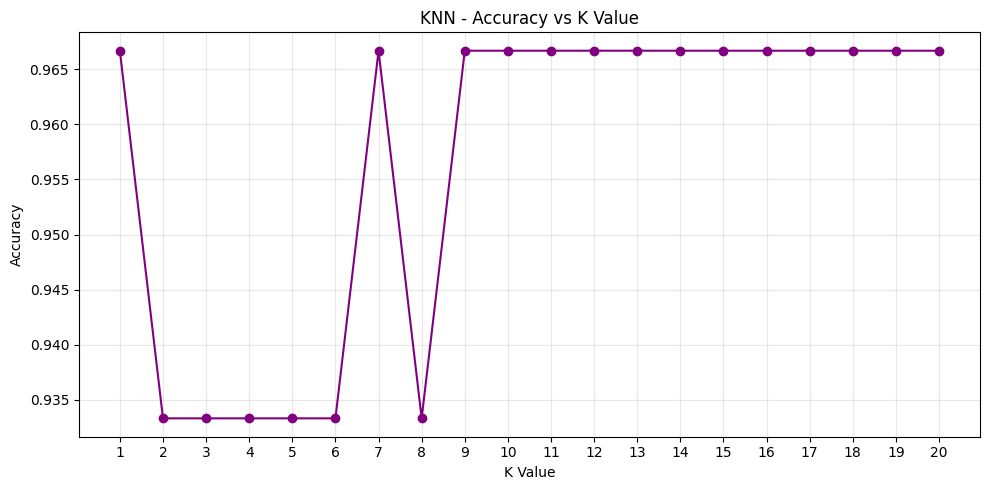


Optimal K: 1 with accuracy: 0.9667


In [9]:
# K-Nearest Neighbors Classifier (using scaled data)
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_scaled, y_train)
knn_predictions = knn_classifier.predict(X_test_scaled)

print("K-NEAREST NEIGHBORS CLASSIFIER (K=5)")
print("="*50)
print(f"Accuracy: {accuracy_score(y_test, knn_predictions):.4f}")
print(f"Precision (macro): {precision_score(y_test, knn_predictions, average='macro'):.4f}")
print(f"Recall (macro): {recall_score(y_test, knn_predictions, average='macro'):.4f}")
print(f"F1-Score (macro): {f1_score(y_test, knn_predictions, average='macro'):.4f}")

# Find optimal K value
k_range = range(1, 21)
k_scores = []
for k in k_range:
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    knn_temp.fit(X_train_scaled, y_train)
    k_scores.append(accuracy_score(y_test, knn_temp.predict(X_test_scaled)))

plt.figure(figsize=(10, 5))
plt.plot(k_range, k_scores, marker='o', color='purple')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.title('KNN - Accuracy vs K Value')
plt.xticks(k_range)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nOptimal K: {k_range[np.argmax(k_scores)]} with accuracy: {max(k_scores):.4f}")

#### 3.5 Logistic Regression
A linear model for classification that predicts probabilities using the logistic function.

In [10]:
# Logistic Regression Classifier
lr_classifier = LogisticRegression(max_iter=200, random_state=42)
lr_classifier.fit(X_train_scaled, y_train)
lr_predictions = lr_classifier.predict(X_test_scaled)
lr_probabilities = lr_classifier.predict_proba(X_test_scaled)

print("LOGISTIC REGRESSION CLASSIFIER")
print("="*50)
print(f"Accuracy: {accuracy_score(y_test, lr_predictions):.4f}")
print(f"Precision (macro): {precision_score(y_test, lr_predictions, average='macro'):.4f}")
print(f"Recall (macro): {recall_score(y_test, lr_predictions, average='macro'):.4f}")
print(f"F1-Score (macro): {f1_score(y_test, lr_predictions, average='macro'):.4f}")

print("\nClassification Report:")
print(classification_report(y_test, lr_predictions, target_names=iris.target_names))

LOGISTIC REGRESSION CLASSIFIER
Accuracy: 0.9333
Precision (macro): 0.9333
Recall (macro): 0.9333
F1-Score (macro): 0.9333

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



#### 3.6 Support Vector Machine (SVM)
A powerful classifier that finds the optimal hyperplane to separate classes with maximum margin.

SUPPORT VECTOR MACHINE CLASSIFIER (RBF Kernel)
Accuracy: 0.9667
Precision (macro): 0.9697
Recall (macro): 0.9667
F1-Score (macro): 0.9666
  Linear Kernel Accuracy: 1.0000
  Poly Kernel Accuracy: 0.9000
  Rbf Kernel Accuracy: 0.9667
  Sigmoid Kernel Accuracy: 0.9000


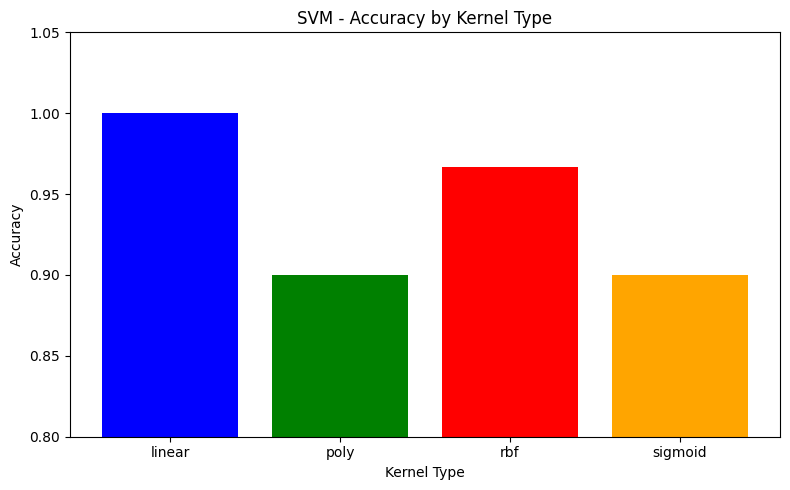

In [11]:
# Support Vector Machine Classifier
svm_classifier = SVC(kernel='rbf', probability=True, random_state=42)
svm_classifier.fit(X_train_scaled, y_train)
svm_predictions = svm_classifier.predict(X_test_scaled)

print("SUPPORT VECTOR MACHINE CLASSIFIER (RBF Kernel)")
print("="*50)
print(f"Accuracy: {accuracy_score(y_test, svm_predictions):.4f}")
print(f"Precision (macro): {precision_score(y_test, svm_predictions, average='macro'):.4f}")
print(f"Recall (macro): {recall_score(y_test, svm_predictions, average='macro'):.4f}")
print(f"F1-Score (macro): {f1_score(y_test, svm_predictions, average='macro'):.4f}")

# Test different kernels
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
kernel_accuracies = []

for kernel in kernels:
    svm_temp = SVC(kernel=kernel, random_state=42)
    svm_temp.fit(X_train_scaled, y_train)
    acc = accuracy_score(y_test, svm_temp.predict(X_test_scaled))
    kernel_accuracies.append(acc)
    print(f"  {kernel.capitalize()} Kernel Accuracy: {acc:.4f}")

plt.figure(figsize=(8, 5))
plt.bar(kernels, kernel_accuracies, color=['blue', 'green', 'red', 'orange'])
plt.xlabel('Kernel Type')
plt.ylabel('Accuracy')
plt.title('SVM - Accuracy by Kernel Type')
plt.ylim(0.8, 1.05)
plt.tight_layout()
plt.show()

#### 3.7 Artificial Neural Network (Multi-Layer Perceptron)
A neural network with one or more hidden layers that learns complex non-linear patterns.

ARTIFICIAL NEURAL NETWORK (MLP)
Architecture: Input(4) -> Hidden(64) -> Hidden(32) -> Output(3)
Activation: ReLU, Solver: Adam

Accuracy: 0.9667
Precision (macro): 0.9697
Recall (macro): 0.9667
F1-Score (macro): 0.9666


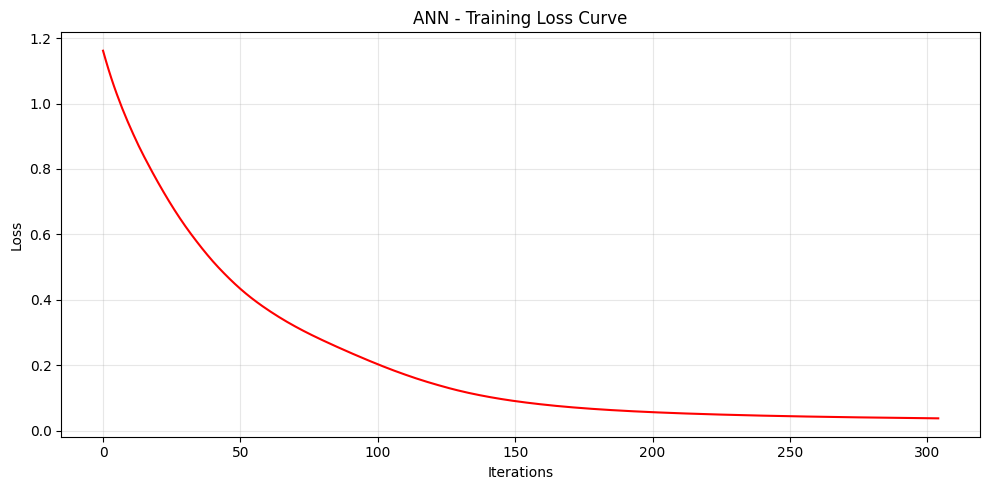


Number of iterations: 305


In [12]:
# Artificial Neural Network (Multi-Layer Perceptron)
mlp_classifier = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500,
                                activation='relu', solver='adam', random_state=42)
mlp_classifier.fit(X_train_scaled, y_train)
mlp_predictions = mlp_classifier.predict(X_test_scaled)

print("ARTIFICIAL NEURAL NETWORK (MLP)")
print("="*50)
print(f"Architecture: Input(4) -> Hidden(64) -> Hidden(32) -> Output(3)")
print(f"Activation: ReLU, Solver: Adam")
print(f"\nAccuracy: {accuracy_score(y_test, mlp_predictions):.4f}")
print(f"Precision (macro): {precision_score(y_test, mlp_predictions, average='macro'):.4f}")
print(f"Recall (macro): {recall_score(y_test, mlp_predictions, average='macro'):.4f}")
print(f"F1-Score (macro): {f1_score(y_test, mlp_predictions, average='macro'):.4f}")

# Plot training loss curve
plt.figure(figsize=(10, 5))
plt.plot(mlp_classifier.loss_curve_, color='red')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('ANN - Training Loss Curve')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nNumber of iterations: {mlp_classifier.n_iter_}")

### Step 4: Model Comparison and Evaluation

MODEL COMPARISON - PERFORMANCE METRICS
              Model  Accuracy  Precision   Recall  F1-Score
      Random Forest  0.966667   0.969697 0.966667  0.966583
        Naive Bayes  0.966667   0.969697 0.966667  0.966583
     Neural Network  0.966667   0.969697 0.966667  0.966583
                SVM  0.966667   0.969697 0.966667  0.966583
      Decision Tree  0.933333   0.933333 0.933333  0.933333
Logistic Regression  0.933333   0.933333 0.933333  0.933333
                KNN  0.933333   0.944444 0.933333  0.932660


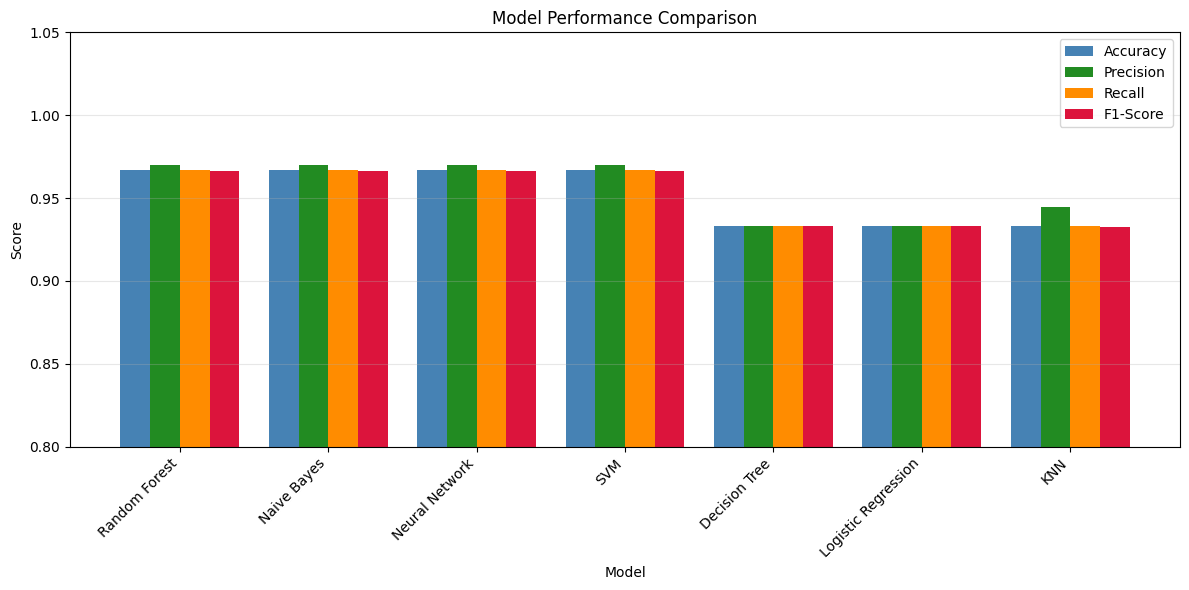

In [13]:
# Compare all models
models = {
    'Decision Tree': dt_predictions,
    'Random Forest': rf_predictions,
    'Naive Bayes': nb_predictions,
    'KNN': knn_predictions,
    'Logistic Regression': lr_predictions,
    'SVM': svm_predictions,
    'Neural Network': mlp_predictions
}

# Calculate metrics for all models
results = []
for name, predictions in models.items():
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, predictions),
        'Precision': precision_score(y_test, predictions, average='macro'),
        'Recall': recall_score(y_test, predictions, average='macro'),
        'F1-Score': f1_score(y_test, predictions, average='macro')
    })

results_df = pd.DataFrame(results)
results_df = results_df.sort_values('Accuracy', ascending=False).reset_index(drop=True)

print("MODEL COMPARISON - PERFORMANCE METRICS")
print("="*70)
print(results_df.to_string(index=False))

# Visualization
fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(len(results_df))
width = 0.2

bars1 = ax.bar(x - 1.5*width, results_df['Accuracy'], width, label='Accuracy', color='steelblue')
bars2 = ax.bar(x - 0.5*width, results_df['Precision'], width, label='Precision', color='forestgreen')
bars3 = ax.bar(x + 0.5*width, results_df['Recall'], width, label='Recall', color='darkorange')
bars4 = ax.bar(x + 1.5*width, results_df['F1-Score'], width, label='F1-Score', color='crimson')

ax.set_xlabel('Model')
ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(results_df['Model'], rotation=45, ha='right')
ax.legend()
ax.set_ylim(0.8, 1.05)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

### Step 5: Confusion Matrices Visualization

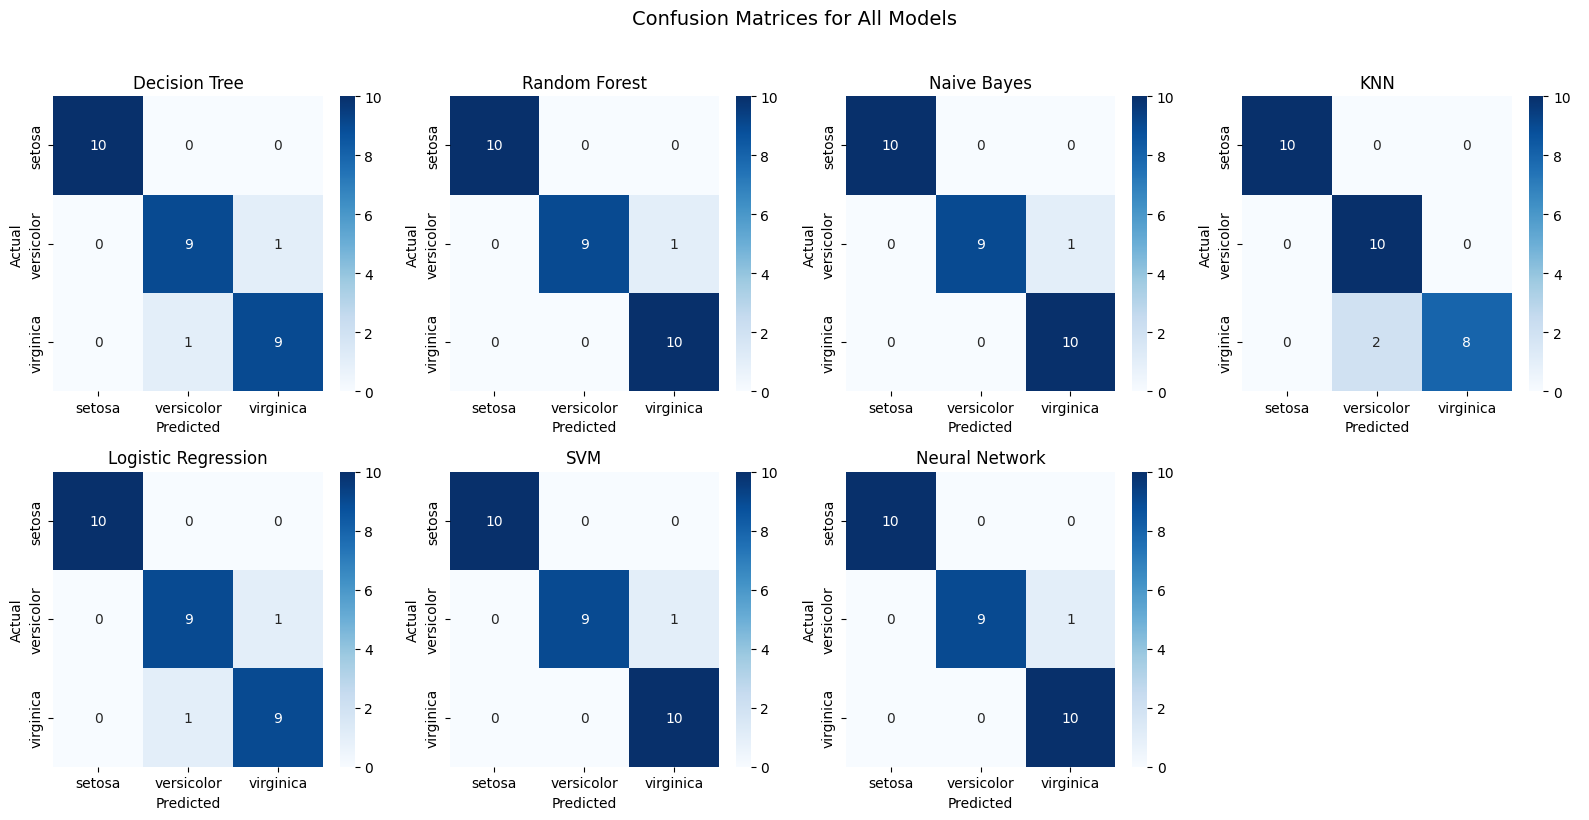

In [14]:
# Plot Confusion Matrices for all models
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()

for idx, (name, predictions) in enumerate(models.items()):
    cm = confusion_matrix(y_test, predictions)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx],
                xticklabels=iris.target_names, yticklabels=iris.target_names)
    axes[idx].set_title(f'{name}')
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')

# Hide the last empty subplot
axes[-1].axis('off')

plt.suptitle('Confusion Matrices for All Models', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

### Step 6: ROC Curves and AUC (One-vs-Rest for Multiclass)

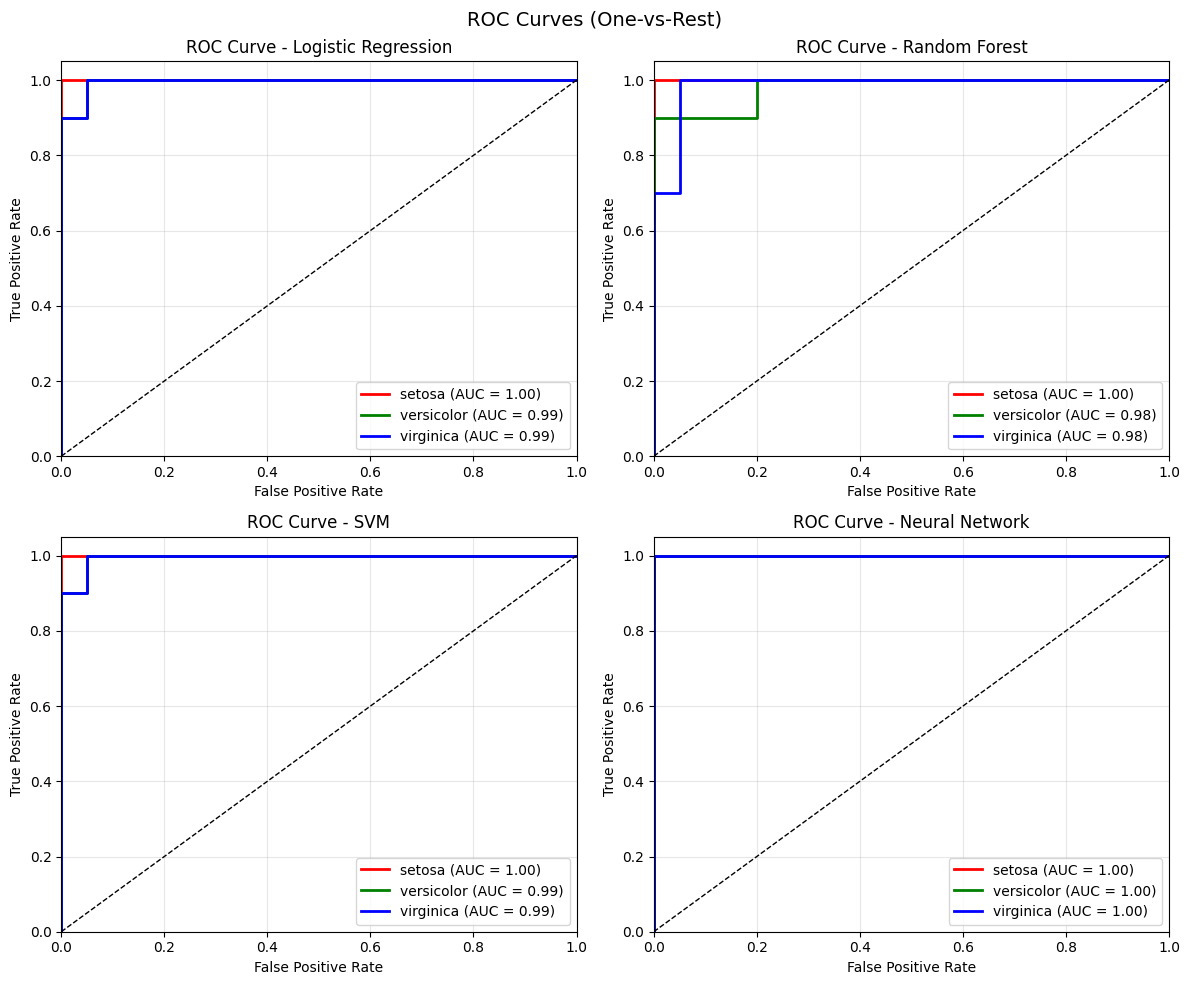

In [15]:
# ROC Curves for models with probability support
from sklearn.preprocessing import label_binarize

# Binarize the output for multiclass ROC
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = 3

# Get probability predictions from models that support it
classifiers_with_proba = {
    'Logistic Regression': lr_classifier,
    'Random Forest': rf_classifier,
    'SVM': svm_classifier,
    'Neural Network': mlp_classifier
}

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for idx, (name, clf) in enumerate(classifiers_with_proba.items()):
    if name in ['Logistic Regression', 'SVM', 'Neural Network']:
        y_score = clf.predict_proba(X_test_scaled)
    else:
        y_score = clf.predict_proba(X_test)

    # Compute ROC curve and AUC for each class
    for i, color, class_name in zip(range(n_classes), ['red', 'green', 'blue'], iris.target_names):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc = auc(fpr, tpr)
        axes[idx].plot(fpr, tpr, color=color, lw=2,
                       label=f'{class_name} (AUC = {roc_auc:.2f})')

    axes[idx].plot([0, 1], [0, 1], 'k--', lw=1)
    axes[idx].set_xlim([0.0, 1.0])
    axes[idx].set_ylim([0.0, 1.05])
    axes[idx].set_xlabel('False Positive Rate')
    axes[idx].set_ylabel('True Positive Rate')
    axes[idx].set_title(f'ROC Curve - {name}')
    axes[idx].legend(loc='lower right')
    axes[idx].grid(True, alpha=0.3)

plt.suptitle('ROC Curves (One-vs-Rest)', fontsize=14)
plt.tight_layout()
plt.show()

### Step 7: Cross-Validation Evaluation
Using **Stratified K-Fold Cross-Validation** to get more robust performance estimates.

5-FOLD STRATIFIED CROSS-VALIDATION RESULTS
Decision Tree       : 0.9533 (+/- 0.0680)
Random Forest       : 0.9600 (+/- 0.0777)
Naive Bayes         : 0.9467 (+/- 0.0800)
KNN                 : 0.9667 (+/- 0.0730)
Logistic Regression : 0.9533 (+/- 0.0904)
SVM                 : 0.9533 (+/- 0.0904)
Neural Network      : 0.9533 (+/- 0.1162)


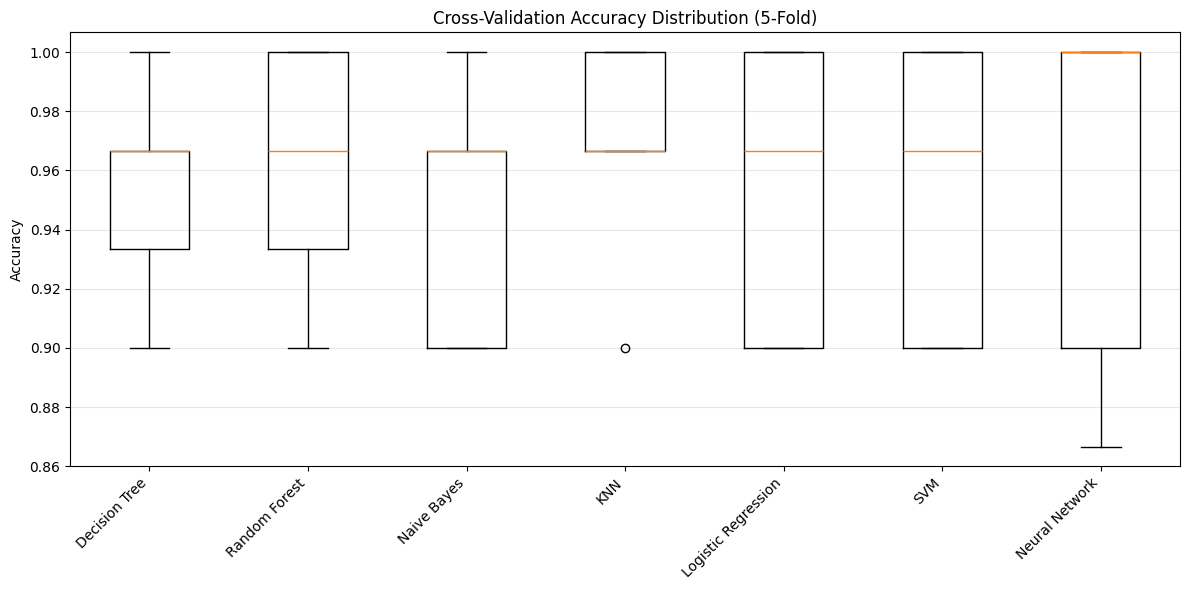

In [16]:
# Cross-Validation for all models
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Scale all data for cross-validation
X_scaled = scaler.fit_transform(X)

cv_models = {
    'Decision Tree': DecisionTreeClassifier(max_depth=4, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=4, random_state=42),
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Logistic Regression': LogisticRegression(max_iter=200, random_state=42),
    'SVM': SVC(kernel='rbf', random_state=42),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
}

cv_results = []
print("5-FOLD STRATIFIED CROSS-VALIDATION RESULTS")
print("="*60)

for name, model in cv_models.items():
    # Use scaled data for models that need it
    if name in ['KNN', 'Logistic Regression', 'SVM', 'Neural Network']:
        scores = cross_val_score(model, X_scaled, y, cv=cv, scoring='accuracy')
    else:
        scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')

    cv_results.append({
        'Model': name,
        'Mean Accuracy': scores.mean(),
        'Std': scores.std(),
        'Scores': scores
    })
    print(f"{name:20s}: {scores.mean():.4f} (+/- {scores.std()*2:.4f})")

# Visualization of cross-validation results
cv_df = pd.DataFrame(cv_results)

plt.figure(figsize=(12, 6))
cv_scores_array = np.array([r['Scores'] for r in cv_results])
plt.boxplot(cv_scores_array.T, labels=cv_df['Model'])
plt.ylabel('Accuracy')
plt.title('Cross-Validation Accuracy Distribution (5-Fold)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### Step 8: Linear Regression (For Prediction/Regression Task)
Demonstrating regression using a continuous target variable.

LINEAR REGRESSION - Predicting Petal Width
R² Score: 0.9271
Mean Squared Error (MSE): 0.0463
Root Mean Squared Error (RMSE): 0.2153
Mean Absolute Error (MAE): 0.1591

Coefficients: [-0.23425621  0.23591069  0.53431313]
Intercept: -0.1693


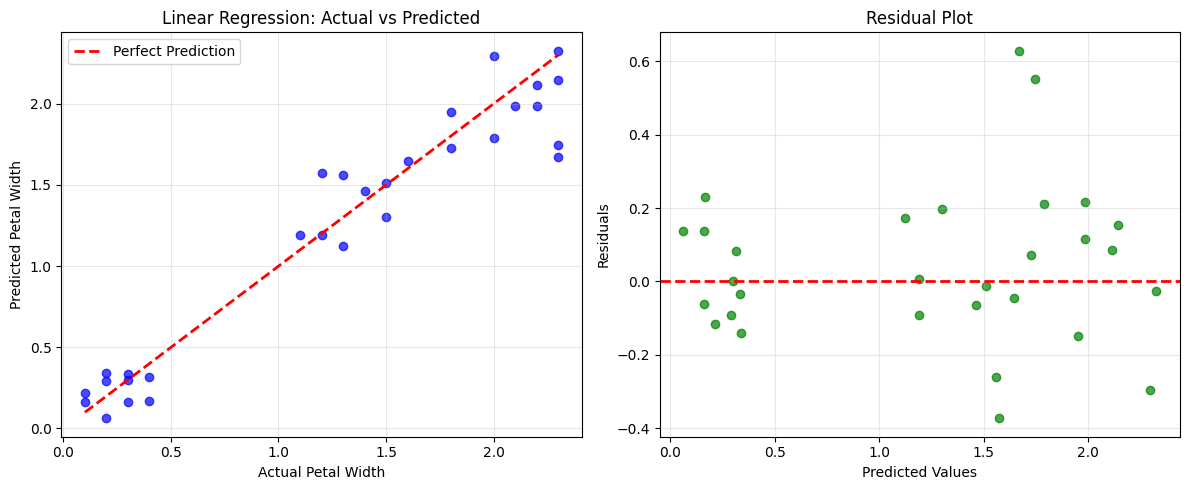

In [17]:
# Linear Regression for continuous prediction
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Use petal length to predict petal width (continuous target)
X_reg = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)']].values
y_reg = df['petal width (cm)'].values

X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

# Linear Regression Model
lin_reg = LinearRegression()
lin_reg.fit(X_reg_train, y_reg_train)
y_reg_pred = lin_reg.predict(X_reg_test)

print("LINEAR REGRESSION - Predicting Petal Width")
print("="*50)
print(f"R² Score: {r2_score(y_reg_test, y_reg_pred):.4f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_reg_test, y_reg_pred):.4f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_reg_test, y_reg_pred)):.4f}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_reg_test, y_reg_pred):.4f}")

print(f"\nCoefficients: {lin_reg.coef_}")
print(f"Intercept: {lin_reg.intercept_:.4f}")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Actual vs Predicted
axes[0].scatter(y_reg_test, y_reg_pred, alpha=0.7, color='blue')
axes[0].plot([y_reg_test.min(), y_reg_test.max()], [y_reg_test.min(), y_reg_test.max()],
             'r--', lw=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual Petal Width')
axes[0].set_ylabel('Predicted Petal Width')
axes[0].set_title('Linear Regression: Actual vs Predicted')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Residual plot
residuals = y_reg_test - y_reg_pred
axes[1].scatter(y_reg_pred, residuals, alpha=0.7, color='green')
axes[1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[1].set_xlabel('Predicted Values')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Residual Plot')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 5.4 Summary and Conclusion

In [18]:
# Final Summary Table
print("="*80)
print("SUPERVISED DATA MINING - FINAL RESULTS SUMMARY")
print("="*80)

print("\n📊 CLASSIFICATION RESULTS (Holdout Method - 80/20 Split)")
print("-"*60)
print(results_df.to_string(index=False))

print("\n📈 CROSS-VALIDATION RESULTS (5-Fold Stratified)")
print("-"*60)
cv_summary = cv_df[['Model', 'Mean Accuracy', 'Std']].copy()
cv_summary['Mean Accuracy'] = cv_summary['Mean Accuracy'].round(4)
cv_summary['Std'] = cv_summary['Std'].round(4)
print(cv_summary.to_string(index=False))

print("\n" + "="*80)
print("KEY OBSERVATIONS:")
print("="*80)
print("""
1. Decision Trees provide interpretable rules but may overfit on small datasets.
2. Random Forests improve accuracy through ensemble learning and reduce overfitting.
3. Naive Bayes is fast and works well with high-dimensional data.
4. KNN is simple but sensitive to feature scaling and choice of K.
5. Logistic Regression provides probabilistic outputs and works well for linearly separable data.
6. SVM with RBF kernel handles non-linear decision boundaries effectively.
7. Neural Networks can learn complex patterns but require more data and tuning.

EVALUATION TECHNIQUES USED:
- Holdout Method (Train-Test Split)
- Stratified K-Fold Cross-Validation
- Confusion Matrix Analysis
- ROC Curves and AUC
- Precision, Recall, F1-Score metrics
""")

print("\n✅ Lab 5 Completed Successfully!")

SUPERVISED DATA MINING - FINAL RESULTS SUMMARY

📊 CLASSIFICATION RESULTS (Holdout Method - 80/20 Split)
------------------------------------------------------------
              Model  Accuracy  Precision   Recall  F1-Score
      Random Forest  0.966667   0.969697 0.966667  0.966583
        Naive Bayes  0.966667   0.969697 0.966667  0.966583
     Neural Network  0.966667   0.969697 0.966667  0.966583
                SVM  0.966667   0.969697 0.966667  0.966583
      Decision Tree  0.933333   0.933333 0.933333  0.933333
Logistic Regression  0.933333   0.933333 0.933333  0.933333
                KNN  0.933333   0.944444 0.933333  0.932660

📈 CROSS-VALIDATION RESULTS (5-Fold Stratified)
------------------------------------------------------------
              Model  Mean Accuracy    Std
      Decision Tree         0.9533 0.0340
      Random Forest         0.9600 0.0389
        Naive Bayes         0.9467 0.0400
                KNN         0.9667 0.0365
Logistic Regression         0.9533 0

## 5.5 Outcome
After completing this lab, students are able to:
- ✅ Understand the difference between classification and prediction (regression) tasks
- ✅ Implement various supervised learning algorithms using scikit-learn
- ✅ Apply proper data preprocessing techniques (scaling, train-test split)
- ✅ Evaluate models using multiple metrics (Accuracy, Precision, Recall, F1-Score)
- ✅ Visualize model performance using Confusion Matrices and ROC Curves
- ✅ Use Cross-Validation for robust model evaluation
- ✅ Compare and select appropriate algorithms for classification tasks